<a href="https://colab.research.google.com/github/SanjaySaatyaki/pytorch_4_ml_dl/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

Linear Regression to make straight line with known *parameter*

In [2]:
weight = 0.7
bias = 0.3


In [4]:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

In [5]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
X.shape

torch.Size([50, 1])

- Traning 60-80
- Validation 10-20
- Testing 10-20

In [9]:
#Create a train/test split
train_split = int(0.8*len(X))
train_split

40

In [10]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [11]:
len(X_train), len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

In [12]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# Visualize the data

In [18]:
def plot_prediction(train_data = X_train,train_labels =y_train,test_data = X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c="b",s=4, label="Training data")
  plt.scatter(test_data,test_labels, c="y",s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions, c="r",s=4, label="Predictions")
  plt.legend(prop={"size":14})

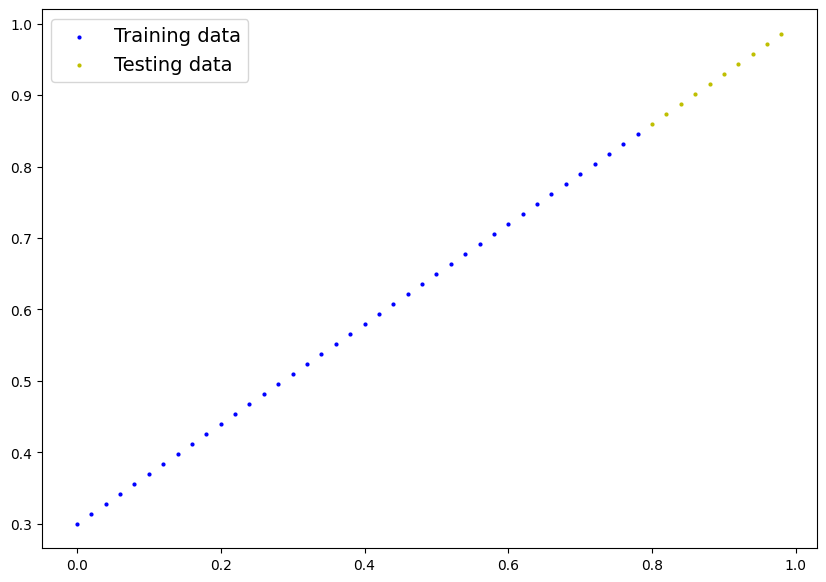

In [19]:
plot_prediction()

https://realpython.com/python-classes/
3Blue 1 Brown - Videos

In [24]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): #<- almost everything inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### Pytorch model building essentials
* torch.nn - contains all of building for computational graphs
* troch.Parameter - Parametere our model try to learn
* torch.nn.Module - base class for all neural network if we subcalss it, mandatory implement forward()
* torch.optim - this where optimizers in Pytorch live, help in optimizing gradiant discent
https://pytorch.org/tutorials/beginner/ptcheat.html

In [32]:
#Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [33]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

Make predictions using torch.inference_mode()

In [35]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [36]:
with torch.inference_mode():#turns of gradiant tracking
  y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

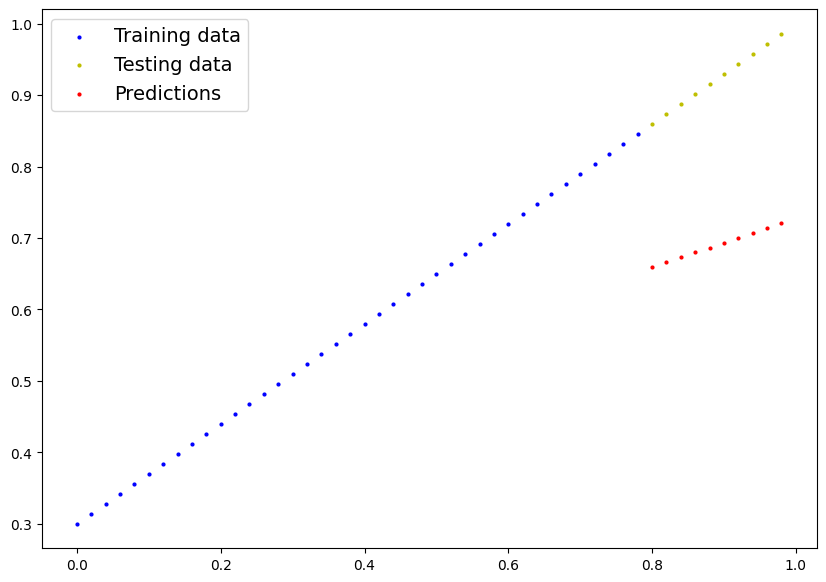

In [37]:
plot_prediction(predictions=y_preds)